In [4]:
import ccxt
import numpy as np
import time
from datetime import datetime
import schedule
import pandas as pd
import pandas_ta as ta



import yfinance as yf
import vectorbt as vbt
from datetime import datetime

In [5]:
df = yf.download('KBANK.BK',interval='1d',period='3y')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-09,142.00,142.50,137.00,138.50,126.598602,17901700
2020-01-10,139.00,140.00,136.50,137.50,125.684517,14664700
2020-01-13,138.00,138.50,135.00,136.00,124.313423,13672700
2020-01-14,135.50,135.50,132.00,133.00,121.571220,17895800
2020-01-15,132.50,135.50,131.50,131.50,120.200104,18789100
2020-01-16,132.00,138.50,131.00,138.00,126.141563,26639200
2020-01-17,141.00,143.00,141.00,141.50,129.340790,20187700
2020-01-20,136.00,137.50,134.00,135.00,123.399345,18087700
2020-01-21,137.50,140.00,137.00,139.00,127.055618,19675300


In [7]:
df.Volume.rolling(5).mean()

Date
2020-01-09           NaN
2020-01-10           NaN
2020-01-13           NaN
2020-01-14           NaN
2020-01-15    16584800.0
2020-01-16    18332300.0
2020-01-17    19436900.0
2020-01-20    20319900.0
2020-01-21    20675800.0
2020-01-22    18415380.0
2020-01-23    19612240.0
2020-01-24    17644260.0
2020-01-27    15917080.0
2020-01-28    13740520.0
2020-01-29    15567340.0
2020-01-30    13974620.0
2020-01-31    14650460.0
2020-02-03    14539400.0
2020-02-04    14270900.0
2020-02-05    13352280.0
2020-02-06    10793420.0
2020-02-07     9288240.0
2020-02-11     9322200.0
2020-02-12     9950240.0
2020-02-13     8783200.0
2020-02-14     8383740.0
2020-02-17     8093360.0
2020-02-18     8666120.0
2020-02-19     8724540.0
2020-02-20    11227540.0
2020-02-21    10738540.0
2020-02-24    12762840.0
2020-02-25    13768420.0
2020-02-26    18979320.0
2020-02-27    20049280.0
2020-02-28    22908420.0
2020-03-02    23909600.0
2020-03-03    23625800.0
2020-03-04    18414220.0
2020-03-05    155466

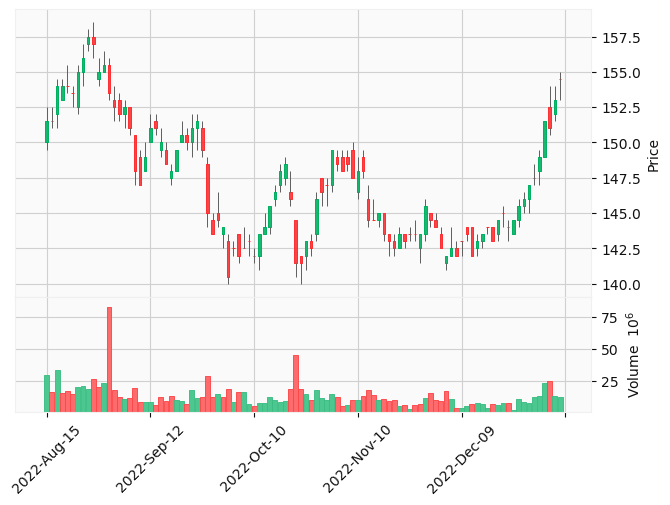

In [8]:
import mplfinance as mpf

mpf.plot(df.iloc[-100:],type='candle',style='yahoo',volume=True)     

<AxesSubplot:xlabel='Date'>

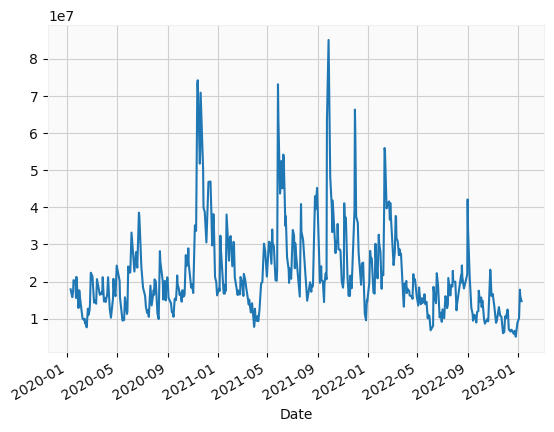

In [10]:
df['Volume'].ewm(span=5,adjust=False).mean().plot()


In [11]:
df['sma_volume'] = df['Volume'].rolling(10).mean()
df['ema_volume'] = ta.ema(df['Volume'], length=10)
df.dropna(inplace=True)

In [12]:
df.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
sma_volume    float64
ema_volume    float64
dtype: object

<AxesSubplot:xlabel='Date'>

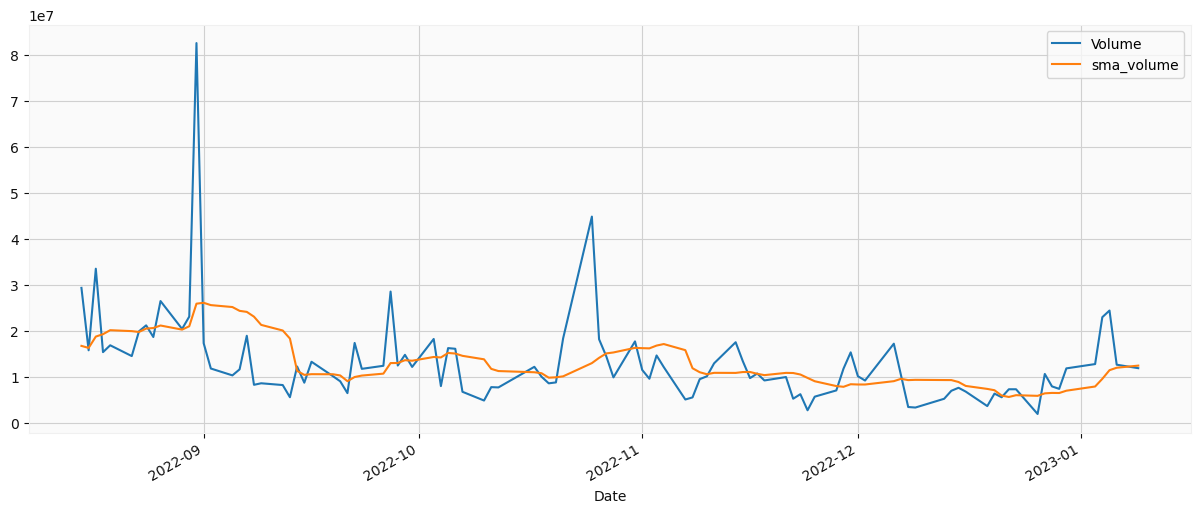

In [13]:
df[['Volume','sma_volume']].iloc[-100:].plot(figsize=(15,6))

# Compare Simple Average, Exp Average


<AxesSubplot:xlabel='Date'>

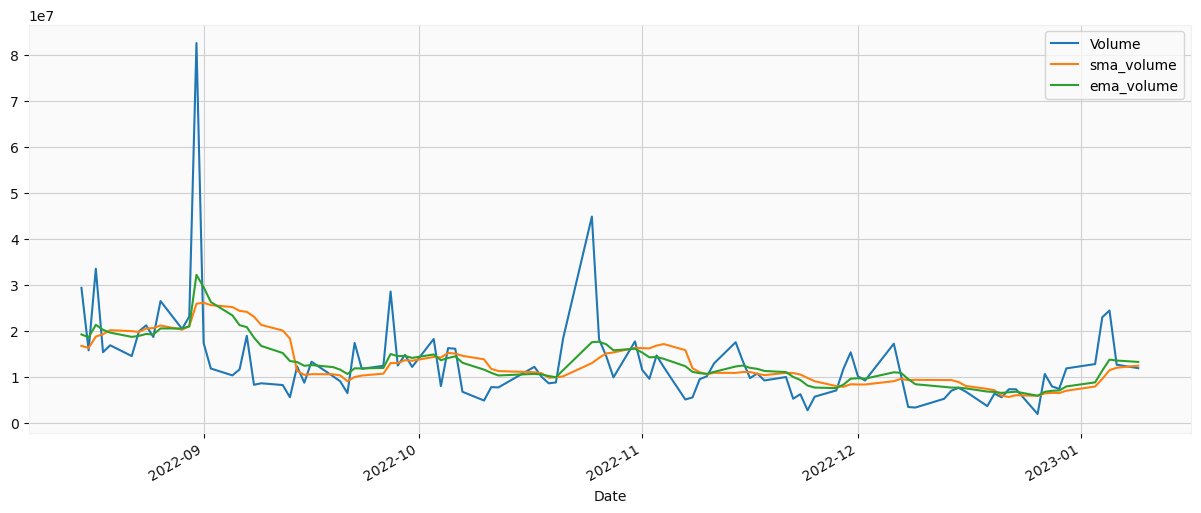

In [14]:
df[['Volume','sma_volume','ema_volume']].iloc[-100:].plot(figsize=(15,6))

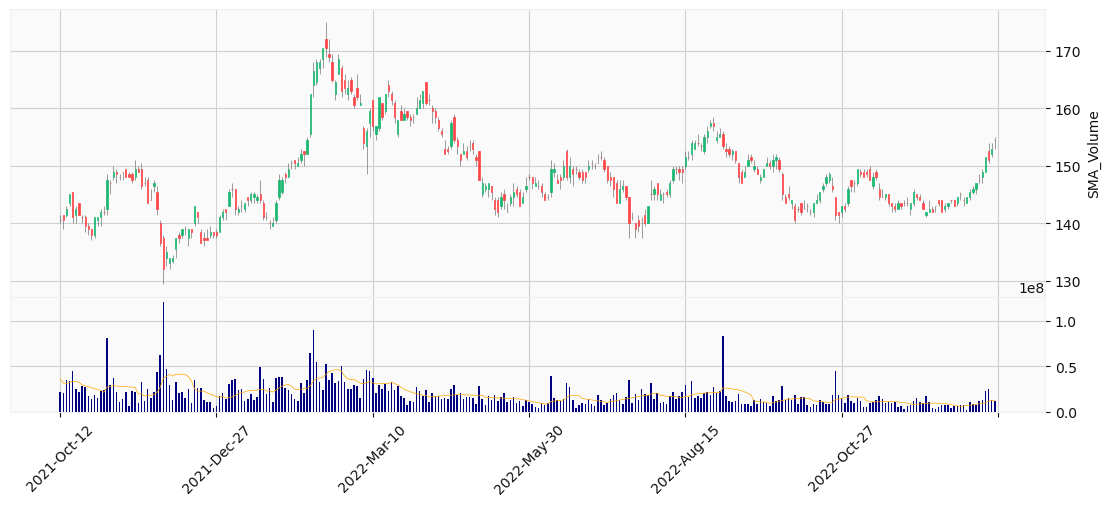

In [15]:
import mplfinance as mpf

adds = [mpf.make_addplot(df['Volume'].iloc[-300:]  ,type='bar',panel=1,width=0.5,color='navy')
        ,mpf.make_addplot(df['sma_volume'].iloc[-300:]  ,type='line',panel=1,width=0.5,color='orange'),]



mpf.plot(df.iloc[-300:],type='candle',style='yahoo',addplot=adds,volume=False,figratio=(15,6),ylabel='SMA_Volume')     

Strategy Example ? 

In [16]:
df.loc[(df['Volume']>df['sma_volume'])& (df['Close']>df['Close'].shift(1)), 'action']  ='Buy' 
df.loc[(df['Volume']>df['sma_volume'])& (df['Close']<df['Close'].shift(1)), 'action']  ='Sell'

In [20]:
[df['action']]

[Date
 2020-01-22     NaN
 2020-01-23     Buy
 2020-01-24     NaN
 2020-01-27     NaN
 2020-01-28     NaN
 2020-01-29     NaN
 2020-01-30     Buy
 2020-01-31     NaN
 2020-02-03     NaN
 2020-02-04     NaN
 2020-02-05     NaN
 2020-02-06     NaN
 2020-02-07     NaN
 2020-02-11     NaN
 2020-02-12     NaN
 2020-02-13     NaN
 2020-02-14     Buy
 2020-02-17     NaN
 2020-02-18    Sell
 2020-02-19    Sell
 2020-02-20    Sell
 2020-02-21     NaN
 2020-02-24    Sell
 2020-02-25    Sell
 2020-02-26    Sell
 2020-02-27     Buy
 2020-02-28    Sell
 2020-03-02     Buy
 2020-03-03     NaN
 2020-03-04     NaN
 2020-03-05     NaN
 2020-03-06     NaN
 2020-03-09     NaN
 2020-03-10     NaN
 2020-03-11     NaN
 2020-03-12    Sell
 2020-03-13     NaN
 2020-03-16     NaN
 2020-03-17    Sell
 2020-03-18     NaN
 2020-03-19     NaN
 2020-03-20     NaN
 2020-03-23    Sell
 2020-03-24     NaN
 2020-03-25     NaN
 2020-03-26     Buy
 2020-03-27     Buy
 2020-03-30     NaN
 2020-03-31     Buy
 2020-04-01   

In [24]:
df[df['action'].notna()]

,Open,High,Low,Close,Adj Close,Volume,sma_volume,ema_volume,action,30D Volume
Date,,,,,,,,,,
2020-01-23,139.00,141.50,138.50,141.50,129.340790,32623500,18972270.0,2.024980e+07,Buy,NaN
2020-01-30,131.50,142.00,131.00,141.50,129.340790,24659900,16793430.0,1.723524e+07,Buy,NaN
2020-02-14,144.50,145.00,142.50,143.50,131.168930,9868300,9588580.0,1.024389e+07,Buy,NaN
2020-02-18,143.00,143.00,140.00,140.00,127.969688,11930100,8994160.0,9.733084e+06,Sell,NaN
2020-02-19,140.50,142.00,138.00,139.00,127.055618,10882300,9337390.0,9.942032e+06,Sell,NaN
2020-02-20,139.00,139.00,133.50,134.00,122.485283,18707800,10005370.0,1.153581e+07,Sell,NaN
2020-02-24,133.50,134.00,129.50,129.50,118.371964,14870700,10428100.0,1.153037e+07,Sell,NaN
2020-02-25,130.00,130.50,125.50,128.00,117.000862,16958000,11217270.0,1.251722e+07,Sell,NaN
2020-02-26,125.00,125.50,115.00,115.50,105.574997,36936800,13851930.0,1.695714e+07,Sell,NaN


In [25]:
#Filter find voulme

In [31]:
df['30D Volume'] = df['Volume'].rolling(window=5).sum()
df['30D Volume']

Date
2020-01-22            NaN
2020-01-23            NaN
2020-01-24            NaN
2020-01-27            NaN
2020-01-28     68702600.0
2020-01-29     77836700.0
2020-01-30     69873100.0
2020-01-31     73252300.0
2020-02-03     72697000.0
2020-02-04     71354500.0
2020-02-05     66761400.0
2020-02-06     53967100.0
2020-02-07     46441200.0
2020-02-11     46611000.0
2020-02-12     49751200.0
2020-02-13     43916000.0
2020-02-14     41918700.0
2020-02-17     40466800.0
2020-02-18     43330600.0
2020-02-19     43622700.0
2020-02-20     56137700.0
2020-02-21     53692700.0
2020-02-24     63814200.0
2020-02-25     68842100.0
2020-02-26     94896600.0
2020-02-27    100246400.0
2020-02-28    114542100.0
2020-03-02    119548000.0
2020-03-03    118129000.0
2020-03-04     92071100.0
2020-03-05     77733000.0
2020-03-06     70291300.0
2020-03-09     66888900.0
2020-03-10     63510700.0
2020-03-11     66526600.0
2020-03-12     79769600.0
2020-03-13     93459200.0
2020-03-16     92069200.0
2020-03

In [32]:
a = df['Volume']>df['30D Volume'].shift()
a[a]

Date
2021-05-27    True
2021-09-23    True
2022-06-09    True
dtype: bool

# filter volume is morethan 5 d volume

In [49]:
df['5D Volume 5MA'] = df['5D Volume'].rolling(window=5).mean()

<AxesSubplot:xlabel='Date'>

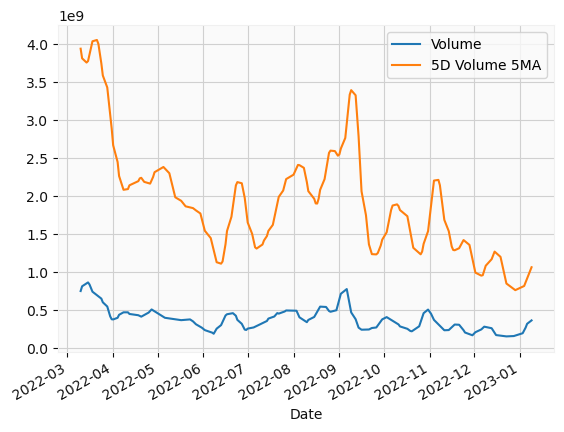

In [50]:
df[['Volume','5D Volume 5MA']].iloc[-200:].plot()

<AxesSubplot:xlabel='Date'>

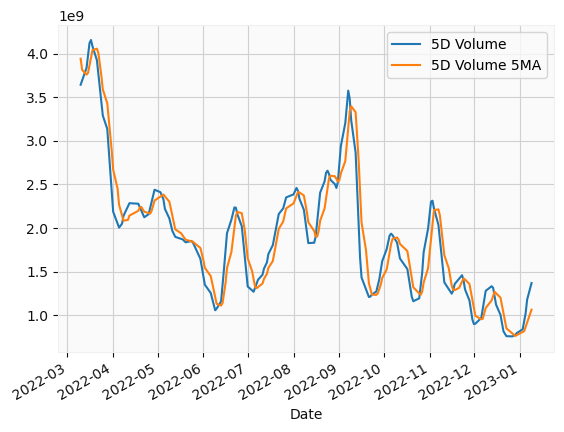

In [51]:
df[['5D Volume','5D Volume 5MA']].iloc[-200:].plot()